<IPython.core.display.Javascript object>


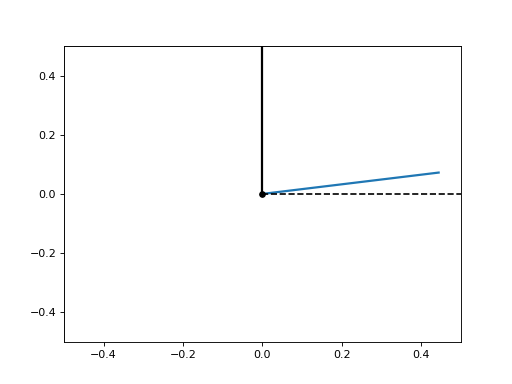

In [2]:


from scipy.integrate import odeint
from math import pi
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

def onejointmuscle(state,t,a0):
    m = 1.65    # kg
    g = -9.81   # m/s/s
    lz = 0.179  # metres
    I = 0.0779  # kg m**2
    k = -10.0   # Nm/rad
    b =  0.5    # Nms/rad
    a = state[0]
    ad = state[1]
    Tmf = max((k*(a-a0)) - (b*ad),0)
    Tme = min((k*(a-a0)) - (b*ad),0)
    add = (m*g*lz*np.cos(a) + Tmf + Tme) / I
    return [ad,add]

state0 = [30*pi/180, 0] # 30 deg initial position and 0 deg/s initial velocity
t = np.linspace(0,5,1001)  # 0 to 5 seconds at 200 Hz
a0 = 30*pi/180          # rest angle for muscles
state = odeint(onejointmuscle, state0, t, args=(a0,))

l = 0.45
fig = plt.figure()
ax = plt.axes(xlim=(-l-.05,l+.05),ylim = (-l-.05,l+.05))
line, = plt.plot([], [], linewidth=2)

plt.plot(0,0,'k.',markersize=10)
plt.plot((0,0),(0,.5),'k-',linewidth=2)
plt.plot((0,.5),(0,0),'k--')
plt.plot((-0.5,0.5,0.5,-0.5,-0.5),(-0.5,-0.5,0.5,0.5,-0.5),'k-',linewidth=0.5)

def init():    
    line.set_data([], [])
    return line,



def animate(i):
    x = [0,l*np.cos(state[i,0])]
    y = [0,l*np.sin(state[i,0])]
    line.set_data(x, y)
    return line,
    

        
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

plt.show()


<IPython.core.display.Javascript object>


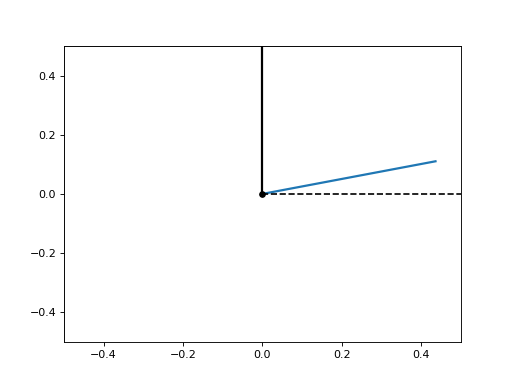